In [1]:
import math
import numpy as np
import scipy.stats as scs
# import statsmodels.api as sm
from pylab import mpl, plt
import pandas as pd
import os
import warnings


plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:


ROOT_PATH = 'C://Users/gilbe/Documents/aifi-bootcamp'

data = pd.read_csv(f'{ROOT_PATH}/data/closing_prices.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Looking at your data

In [3]:
data.head()

,AAPL,ABBV,ABT,AMGN,AMZN,AVGO,BA,BAC,BMY,C,...,PFE,PG,PM,T,UNH,V,VZ,WFC,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,27.294495,NaN,21.129273,49.792737,133.90,16.673423,45.640616,14.639460,19.648366,32.843185,...,13.934719,47.114847,34.709530,18.323770,27.878733,20.694802,20.828887,22.385830,43.935552,53.998112
2010-01-05,27.341684,NaN,20.958563,49.365427,134.69,16.797192,47.135432,15.115313,19.341720,34.098954,...,13.735967,47.130264,34.407096,18.234010,27.834524,20.457660,20.566022,23.000375,43.498060,54.208950
2010-01-06,26.906778,NaN,21.074956,48.994453,132.25,16.929801,48.565255,15.292591,19.334054,35.161528,...,13.691800,46.906716,34.407096,17.971143,28.108625,20.182950,20.274994,23.033151,43.400840,54.677481
2010-01-07,26.857038,NaN,21.249546,48.545833,130.00,16.823714,50.531263,15.796435,19.349386,35.258126,...,13.640272,46.652332,34.836130,17.769366,29.187345,20.370786,20.154309,23.868932,43.425145,54.505686
2010-01-08,27.035592,NaN,21.358180,48.977198,133.52,16.947483,50.043823,15.656478,19.027407,34.678540,...,13.750689,46.590664,34.646230,17.639188,28.913244,20.427137,20.167013,23.647696,43.206399,54.287039


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2055 entries, 2010-01-04 to 2018-03-02
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2055 non-null   float64
 1   ABBV    1301 non-null   float64
 2   ABT     2055 non-null   float64
 3   AMGN    2055 non-null   float64
 4   AMZN    2055 non-null   float64
 5   AVGO    2055 non-null   float64
 6   BA      2055 non-null   float64
 7   BAC     2055 non-null   float64
 8   BMY     2055 non-null   float64
 9   C       2055 non-null   float64
 10  CELG    2055 non-null   float64
 11  CMCSA   2055 non-null   float64
 12  CSCO    2055 non-null   float64
 13  CVX     2055 non-null   float64
 14  DIS     2055 non-null   float64
 15  DWDP    129 non-null    float64
 16  FB      1456 non-null   float64
 17  GE      2055 non-null   float64
 18  GILD    2055 non-null   float64
 19  GOOG    991 non-null    float64
 20  GOOGL   2055 non-null   float64
 21  HD      2055 non-nu

In [5]:
no_st = 5#data.shape[1]
data.T.head(no_st)

date,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2018-02-16,2018-02-20,2018-02-21,2018-02-22,2018-02-23,2018-02-26,2018-02-27,2018-02-28,2018-03-01,2018-03-02
AAPL,27.294495,27.341684,26.906778,26.857038,27.035592,26.797095,26.492278,26.865966,26.710369,26.263985,...,172.43,171.85,171.07,172.50,175.50,178.97,178.39,178.12,175.00,176.21
ABBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,118.60,117.98,117.91,117.56,118.75,121.54,118.26,115.83,113.84,115.04
ABT,21.129273,20.958563,21.074956,21.249546,21.358180,21.466814,21.466814,21.606486,21.629933,21.684643,...,60.17,59.12,58.99,58.99,59.71,60.53,60.55,60.33,58.79,59.46
AMGN,49.792737,49.365427,48.994453,48.545833,48.977198,49.192881,48.338778,48.770143,48.450933,48.528579,...,183.55,182.98,182.43,182.45,186.67,188.50,185.79,183.77,183.29,185.08
AMZN,133.900000,134.690000,132.250000,130.000000,133.520000,130.308000,127.350000,129.110000,127.350000,127.140000,...,1448.69,1468.35,1482.92,1485.34,1500.00,1521.95,1511.98,1512.45,1493.45,1500.25


In [6]:
data[2050:].T # gives the last five rows but transposed so we can see all stocks

date,2018-02-26,2018-02-27,2018-02-28,2018-03-01,2018-03-02
AAPL,178.970000,178.390000,178.120000,175.000000,176.210000
ABBV,121.540000,118.260000,115.830000,113.840000,115.040000
ABT,60.530000,60.550000,60.330000,58.790000,59.460000
AMGN,188.500000,185.790000,183.770000,183.290000,185.080000
AMZN,1521.950000,1511.980000,1512.450000,1493.450000,1500.250000
AVGO,251.163269,250.031322,244.719112,241.591362,249.097962
BA,363.480000,364.640000,362.210000,349.690000,344.670000
BAC,32.296886,32.207228,31.978101,31.480000,31.630000
BMY,68.630000,67.840000,66.200000,65.690000,66.170000
C,77.650000,76.380000,75.490000,73.660000,73.680000


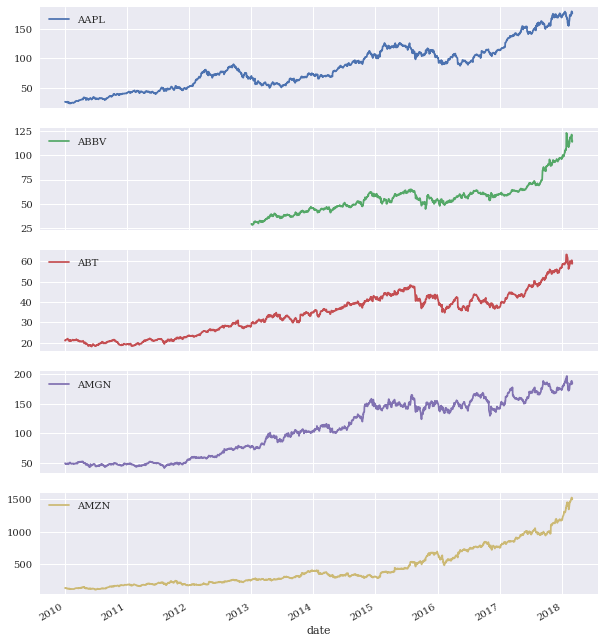

In [7]:
data[data.columns[:5]].plot(figsize=(10, 12), subplots=True);

## Summary Statistics

In [8]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
AAPL,2055.0,84.98,38.25,24.49,52.79,78.60,109.91,178.97
ABBV,1301.0,56.48,16.87,28.00,45.47,55.39,61.49,123.21
ABT,2055.0,34.04,10.55,18.07,23.23,34.90,41.71,63.42
AMGN,2055.0,106.66,46.26,41.64,58.17,104.85,149.21,196.55
AMZN,2055.0,436.14,305.36,108.61,210.86,312.06,626.38,1521.95
AVGO,2055.0,89.23,75.03,14.85,30.12,52.36,137.02,280.75
BA,2055.0,111.62,61.09,45.64,62.09,111.91,131.41,364.64
BAC,2055.0,14.68,5.53,4.69,11.51,14.35,16.26,32.38
BMY,2055.0,42.50,16.21,17.41,27.31,45.17,56.77,73.74
C,2055.0,46.05,11.69,22.34,38.45,46.13,51.46,79.75


In [9]:
data.mean()

AAPL      84.982961
ABBV      56.482115
ABT       34.044908
AMGN     106.663043
AMZN     436.142146
AVGO      89.232787
BA       111.618641
BAC       14.681973
BMY       42.499050
C         46.050733
CELG      74.997386
CMCSA     22.279004
CSCO      22.304846
CVX       89.836500
DIS       69.628144
DWDP      70.625721
FB        88.543663
GE        20.623390
GILD      56.600132
GOOG     731.208798
GOOGL    538.439412
HD        81.996336
HON       80.550151
IBM      147.350307
INTC      25.467309
JNJ       82.695168
JPM       52.858795
KO        34.274791
MA        69.533992
MCD       92.115612
MDT       54.679667
MMM      122.517625
MO        38.215591
MRK       43.451927
MSFT      39.165661
NVDA      41.199164
ORCL      34.397347
PCLN     996.652766
PEP       77.187097
PFE       24.289410
PG        67.483852
PM        71.726150
T         28.128105
UNH       88.901352
V         52.616094
VZ        37.377362
WFC       38.757409
WMT       62.630906
XOM       73.470751
dtype: float64

In [10]:
data.aggregate([min, max, np.mean, np.std, np.median]).T.round(2)

,min,max,mean,std,median
AAPL,24.49,178.97,84.98,38.25,78.60
ABBV,28.00,123.21,56.48,16.87,55.39
ABT,18.07,63.42,34.04,10.55,34.90
AMGN,41.64,196.55,106.66,46.26,104.85
AMZN,108.61,1521.95,436.14,305.36,312.06
AVGO,14.85,280.75,89.23,75.03,52.36
BA,45.64,364.64,111.62,61.09,111.91
BAC,4.69,32.38,14.68,5.53,14.35
BMY,17.41,73.74,42.50,16.21,45.17
C,22.34,79.75,46.05,11.69,46.13


# Changes over time, rolling statistics

In [11]:
data.diff().T.head(no_st)

date,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2018-02-16,2018-02-20,2018-02-21,2018-02-22,2018-02-23,2018-02-26,2018-02-27,2018-02-28,2018-03-01,2018-03-02
AAPL,NaN,0.047189,-0.434906,-0.04974,0.178554,-0.238497,-0.304817,0.373688,-0.155597,-0.446384,...,-0.56,-0.58,-0.78,1.43,3.00,3.47,-0.58,-0.27,-3.12,1.21
ABBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.70,-0.62,-0.07,-0.35,1.19,2.79,-3.28,-2.43,-1.99,1.20
ABT,NaN,-0.170710,0.116393,0.17459,0.108634,0.108634,0.000000,0.139672,0.023447,0.054710,...,0.67,-1.05,-0.13,0.00,0.72,0.82,0.02,-0.22,-1.54,0.67
AMGN,NaN,-0.427310,-0.370974,-0.44862,0.431365,0.215683,-0.854103,0.431365,-0.319210,0.077646,...,-0.05,-0.57,-0.55,0.02,4.22,1.83,-2.71,-2.02,-0.48,1.79
AMZN,NaN,0.790000,-2.440000,-2.25000,3.520000,-3.212000,-2.958000,1.760000,-1.760000,-0.210000,...,-13.07,19.66,14.57,2.42,14.66,21.95,-9.97,0.47,-19.00,6.80


In [12]:
data.diff().mean()

AAPL     0.072500
ABBV     0.066057
ABT      0.018662
AMGN     0.065865
AMZN     0.665214
AVGO     0.113157
BA       0.145584
BAC      0.008272
BMY      0.022649
C        0.019882
CELG     0.029922
CMCSA    0.014185
CSCO     0.011591
CVX      0.025983
DIS      0.036154
DWDP     0.021136
FB       0.095112
GE       0.001117
GILD     0.028215
GOOG     0.525717
GOOGL    0.374778
HD       0.074878
HON      0.055842
IBM      0.023129
INTC     0.016053
JNJ      0.038261
JPM      0.037941
KO       0.010299
MA       0.073204
MCD      0.048505
MDT      0.020169
MMM      0.079241
MO       0.023657
MRK      0.012881
MSFT     0.033112
NVDA     0.106819
ORCL     0.013526
PCLN     0.820332
PEP      0.029635
PFE      0.010718
PG       0.015767
PM       0.034539
T        0.008776
UNH      0.095697
V        0.048722
VZ       0.013355
WFC      0.017052
WMT      0.021574
XOM      0.010493
dtype: float64

## Percentage change

In [13]:
data.pct_change().round(3).T.head(no_st)

date,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2018-02-16,2018-02-20,2018-02-21,2018-02-22,2018-02-23,2018-02-26,2018-02-27,2018-02-28,2018-03-01,2018-03-02
AAPL,NaN,0.002,-0.016,-0.002,0.007,-0.009,-0.011,0.014,-0.006,-0.017,...,-0.003,-0.003,-0.005,0.008,0.017,0.020,-0.003,-0.002,-0.018,0.007
ABBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.032,-0.005,-0.001,-0.003,0.010,0.023,-0.027,-0.021,-0.017,0.011
ABT,NaN,-0.008,0.006,0.008,0.005,0.005,0.000,0.007,0.001,0.003,...,0.011,-0.017,-0.002,0.000,0.012,0.014,0.000,-0.004,-0.026,0.011
AMGN,NaN,-0.009,-0.008,-0.009,0.009,0.004,-0.017,0.009,-0.007,0.002,...,-0.000,-0.003,-0.003,0.000,0.023,0.010,-0.014,-0.011,-0.003,0.010
AMZN,NaN,0.006,-0.018,-0.017,0.027,-0.024,-0.023,0.014,-0.014,-0.002,...,-0.009,0.014,0.010,0.002,0.010,0.015,-0.007,0.000,-0.013,0.005


In [14]:
rets = np.log(data/data.shift(1))
rets.head(no_st).round(3)

,AAPL,ABBV,ABT,AMGN,AMZN,AVGO,BA,BAC,BMY,C,...,PFE,PG,PM,T,UNH,V,VZ,WFC,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.002,NaN,-0.008,-0.009,0.006,0.007,0.032,0.032,-0.016,0.038,...,-0.014,0.000,-0.009,-0.005,-0.002,-0.012,-0.013,0.027,-0.010,0.004
2010-01-06,-0.016,NaN,0.006,-0.008,-0.018,0.008,0.030,0.012,-0.000,0.031,...,-0.003,-0.005,0.000,-0.015,0.010,-0.014,-0.014,0.001,-0.002,0.009
2010-01-07,-0.002,NaN,0.008,-0.009,-0.017,-0.006,0.040,0.032,0.001,0.003,...,-0.004,-0.005,0.012,-0.011,0.038,0.009,-0.006,0.036,0.001,-0.003
2010-01-08,0.007,NaN,0.005,0.009,0.027,0.007,-0.010,-0.009,-0.017,-0.017,...,0.008,-0.001,-0.005,-0.007,-0.009,0.003,0.001,-0.009,-0.005,-0.004


# Example of lambda function and slicing

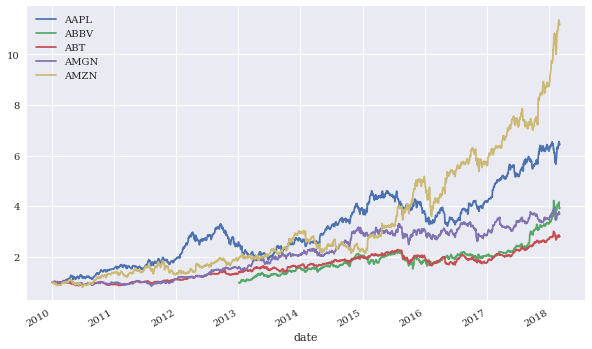

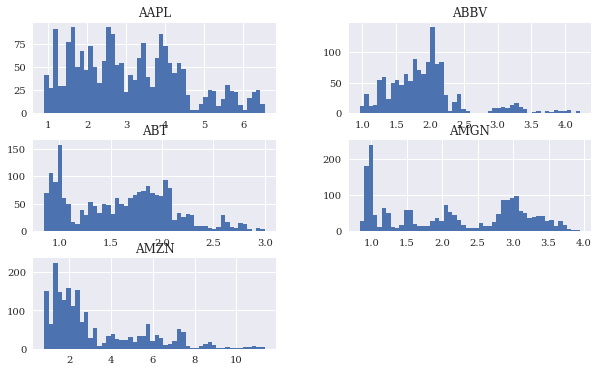

In [15]:
rets[rets.columns[:5]].cumsum().apply(np.exp).plot(figsize=(10, 6));

rets[rets.columns[:5]].cumsum().apply(np.exp).hist(figsize=(10, 6), bins=50);
rets[rets.columns[:5]].cumsum().apply(np.exp).boxplot(figsize=(10, 6));

# Resampling

First we resample the data to weekly time intervals.

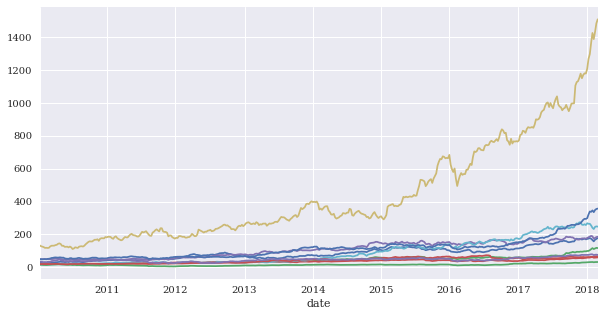

In [16]:
data.iloc[:, :10].resample('1w', label='right').mean().plot(figsize=(10, 5), legend=False);